In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('C:/Users/92314/Desktop/Untitled Folder/Codsoft/Credit Card Fraud Detection/fraudTrain.csv')

In [3]:
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
train_data.drop_duplicates(keep='first')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [6]:
train_data['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

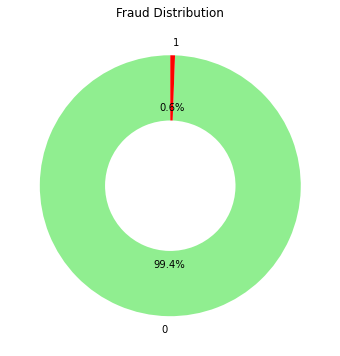

In [8]:
# Plot a filled circle with the areas representing the counts

fraud_counts = train_data['is_fraud'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=fraud_counts.keys(), colors=['lightgreen', 'red'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5))
plt.title('Fraud Distribution')
plt.show()

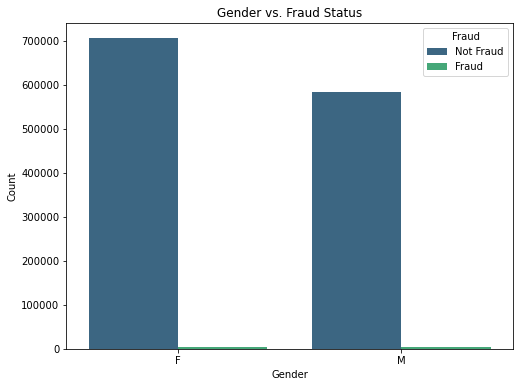

In [9]:
# Ploting gender vs. is_fraud
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='is_fraud', data=train_data, palette='viridis')
plt.title('Gender vs. Fraud Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Not Fraud', 'Fraud'])
plt.show()

# Data Preprocessing

In [10]:
from datetime import datetime

In [11]:
# Convert 'dob' to datetime
train_data['dob'] = pd.to_datetime(train_data['dob'])

# Calculate age
train_data['age'] = (datetime.now() - train_data['dob']).astype('<m8[Y]')

In [12]:
train_data['age'] = train_data['age'].astype(int)

In [13]:
train_data['age']

0          35
1          45
2          62
3          57
4          37
           ..
1296670    62
1296671    44
1296672    56
1296673    43
1296674    28
Name: age, Length: 1296675, dtype: int32

In [14]:
# Split date and time portions into separate columns
train_data[['date', 'time']] = train_data['trans_date_trans_time'].str.split(expand=True)

In [15]:
train_data[['date', 'time']]

,date,time
0,2019-01-01,00:00:18
1,2019-01-01,00:00:44
2,2019-01-01,00:00:51
3,2019-01-01,00:01:16
4,2019-01-01,00:03:06
...,...,...
1296670,2020-06-21,12:12:08
1296671,2020-06-21,12:12:19
1296672,2020-06-21,12:12:32
1296673,2020-06-21,12:13:36


In [16]:
# Convert 'date' column to datetime
train_data['date'] = pd.to_datetime(train_data['date'])

# Extract year, month, and day
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day

In [20]:
# Convert 'time' to datetime
train_data['time'] = pd.to_datetime(train_data['time'], format='%H:%M:%S')

# Extract hours, minutes, and seconds
train_data['hours'] = train_data['time'].dt.hour
train_data['minutes'] = train_data['time'].dt.minute
train_data['seconds'] = train_data['time'].dt.second

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['category'] = le.fit_transform(train_data['category'])

In [35]:
# Droping unnecessary culmns

#subset the training data
train=train_data[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long', 
                  'age','year','month','day','hours','minutes','seconds','is_fraud']]

In [36]:
train.head(4)

,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,year,month,day,hours,minutes,seconds,is_fraud
0,8,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,35,2019,1,1,0,0,18,0
1,4,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,45,2019,1,1,0,0,44,0
2,0,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,62,2019,1,1,0,0,51,0
3,2,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,57,2019,1,1,0,1,16,0


## Getting the Data ready for Modeling

In [37]:
X = train.drop('is_fraud', axis=1)
Y = train['is_fraud']

In [38]:
X.head(4)

,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,year,month,day,hours,minutes,seconds
0,8,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,35,2019,1,1,0,0,18
1,4,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,45,2019,1,1,0,0,44
2,0,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,62,2019,1,1,0,0,51
3,2,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,57,2019,1,1,0,1,16


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.25, shuffle=True)

# Data Modeling

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

In [42]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [43]:
rf_classifier.score(X_test,y_test)

0.9981213502833398

In [44]:
y_pred = rf_classifier.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, classification_report
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    322316
           1       0.97      0.69      0.81      1853

    accuracy                           1.00    324169
   macro avg       0.99      0.85      0.90    324169
weighted avg       1.00      1.00      1.00    324169



In [53]:
from sklearn.metrics import confusion_matrix
import itertools


#confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred = y_pred)
print(cm)


[[322280     36]
 [   573   1280]]


In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        "without normalization"

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

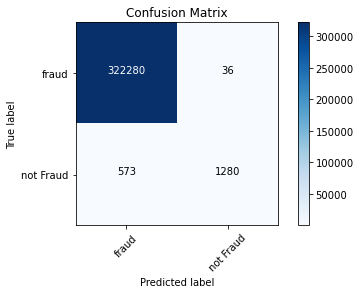

In [55]:
cm_plot_labels = ["fraud","not Fraud"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')